In [13]:
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)

matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)

import numpy as np


In [12]:
help(matplotlib.rc)

Help on function rc in module matplotlib:

rc(group, **kwargs)
    Set the current rc params.  *group* is the grouping for the rc, e.g.,
    for ``lines.linewidth`` the group is ``lines``, for
    ``axes.facecolor``, the group is ``axes``, and so on.  Group may
    also be a list or tuple of group names, e.g., (*xtick*, *ytick*).
    *kwargs* is a dictionary attribute name/value pairs, e.g.,::
    
      rc('lines', linewidth=2, color='r')
    
    sets the current rc params and is equivalent to::
    
      rcParams['lines.linewidth'] = 2
      rcParams['lines.color'] = 'r'
    
    The following aliases are available to save typing for interactive
    users:
    
    =====   =================
    Alias   Property
    =====   =================
    'lw'    'linewidth'
    'ls'    'linestyle'
    'c'     'color'
    'fc'    'facecolor'
    'ec'    'edgecolor'
    'mew'   'markeredgewidth'
    'aa'    'antialiased'
    =====   =================
    
    Thus you could abbreviate the abov

In [2]:
planet_3b_rsr = r"D:\RSRs\PlanetScope_RSR_SatID_0f_10.csv"
planet_sd_rsr = r"D:\RSRs\PlanetScope_RSR_SatID_3K_3R_3S.csv"

## Planet 3B

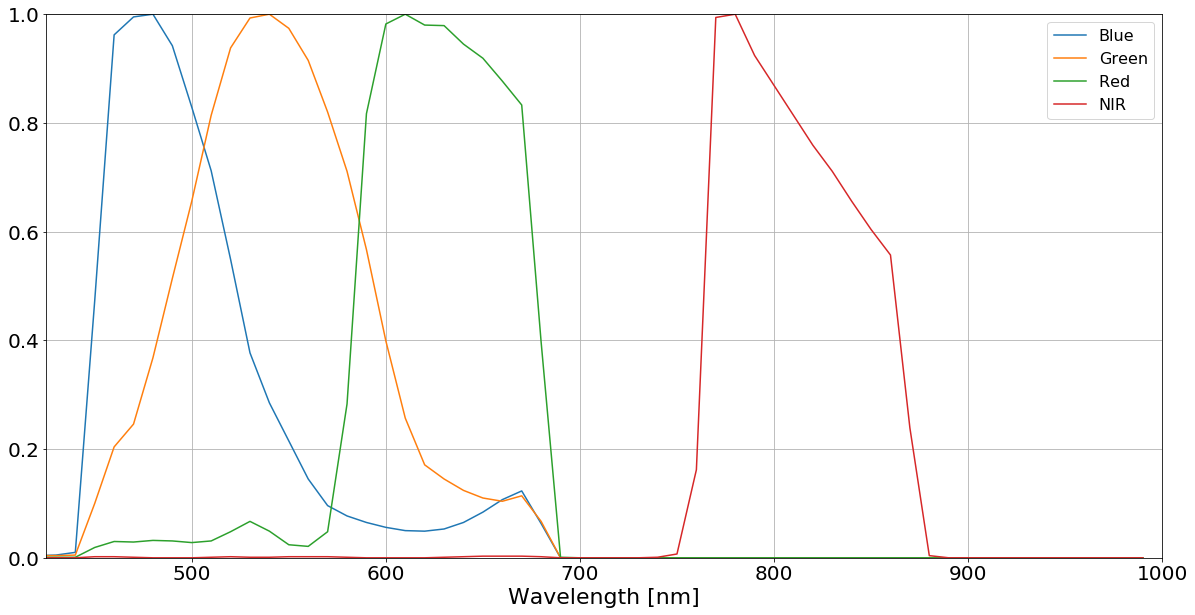

In [17]:
rsr_df = pd.read_csv(planet_3b_rsr)

# wavelength is in um, convert to nm
rsr_df['Wavelength [nm]'] = rsr_df[rsr_df.keys()[0]]*1000

axx = rsr_df.plot(x=rsr_df.keys()[-1], y=rsr_df.keys()[1:5],
           figsize=(20,10),
           grid=True);

axx.set_ylim([0,1])
axx.set_xlim([425,1000])
axx.legend(prop={'size': 16})

## Planet SD

Index(['Wavelength (nm)', 'Blue', 'Green', 'Red', 'NIR'], dtype='object')


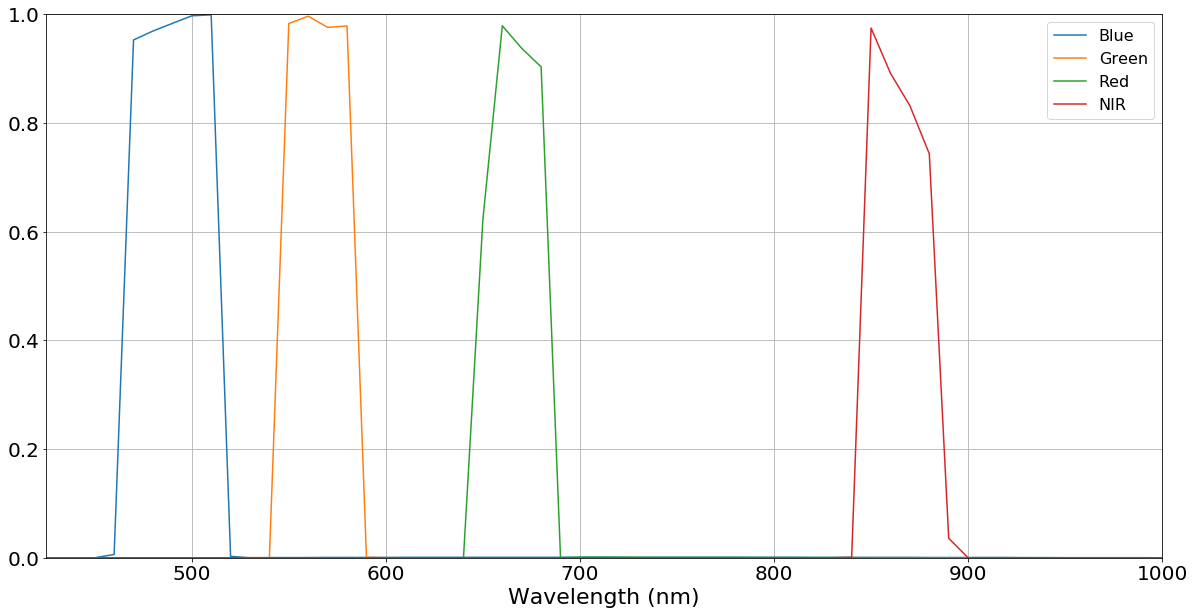

In [25]:
rsr_df = pd.read_csv(planet_sd_rsr)

# rename columns
rsr_df.rename(columns={' Blue response':'Blue',
                ' Green response':'Green',
                ' Red response':'Red',
                ' NIR response': 'NIR'}, 
                 inplace=True)

print(rsr_df.columns)
       
axx = rsr_df.plot(x=rsr_df.keys()[0],
           figsize=(20,10),
           grid=True);

axx.set_ylim([0,1])
axx.set_xlim([425,1000])
axx.legend(prop={'size': 16});

## Kernel

In [6]:
f490 = r"D:\projects\RD\UAV\mapir_kernel\transmission_curves\F490.xlsx"
f550 = r"D:\projects\RD\UAV\mapir_kernel\transmission_curves\F550.xlsx"
f650 = r"D:\projects\RD\UAV\mapir_kernel\transmission_curves\F650.xlsx"
f725 = r"D:\projects\RD\UAV\mapir_kernel\transmission_curves\F725.xlsx"
f850 = r"D:\projects\RD\UAV\mapir_kernel\transmission_curves\F850.xlsx"

df490 = pd.read_excel(f490, skiprows=1, names=['Wavelength [nm]', 'F490'])
df490['F490'] /= 100

df550 = pd.read_excel(f550, skiprows=2, names=['Wavelength [nm]', 'F550'])
df550['F550'] /= 100

df650 = pd.read_excel(f650, names=['Wavelength [nm]', 'F650'])
df650['F650'] /= 100

df725 = pd.read_excel(f725, names=['Wavelength [nm]', 'F725'])
df725['F725'] /= 100

df850 = pd.read_excel(f850, names=['Wavelength [nm]', 'F850'])
df850['F850'] /= 100

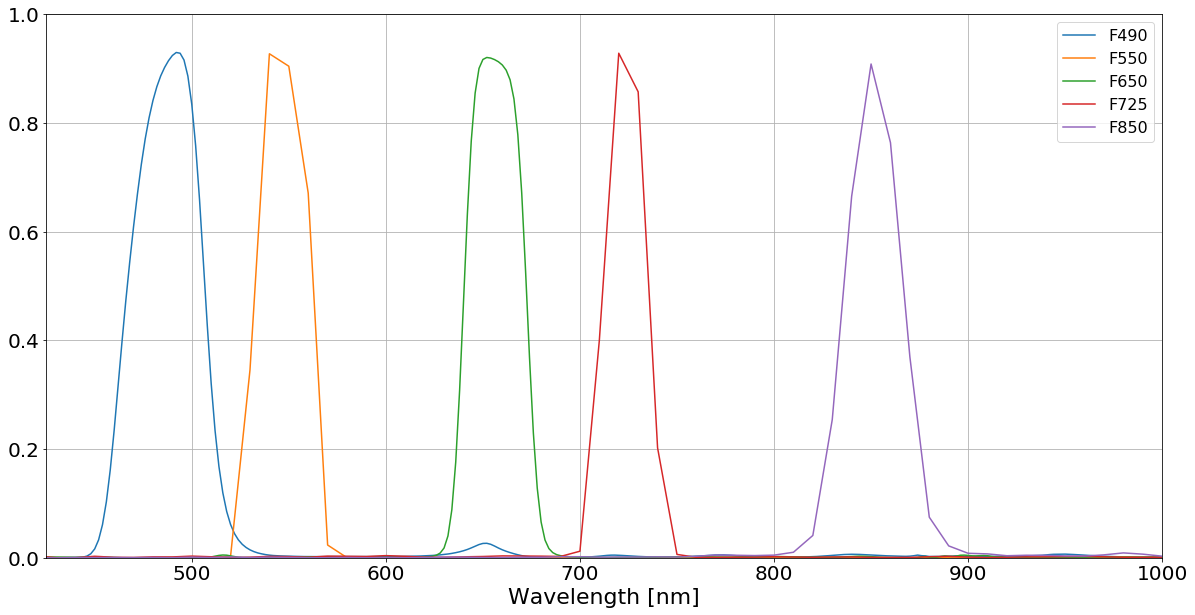

In [15]:
axx = df490.plot(x=df490.keys()[0], figsize=(20,10))
axx = df550.plot(ax=axx, x=df550.keys()[0])
axx = df650.plot(ax=axx, x=df550.keys()[0])
axx = df725.plot(ax=axx, x=df725.keys()[0])
axx = df850.plot(ax=axx, x=df850.keys()[0])
axx.set_ylim([0,1])
axx.set_xlim([425,1000])
axx.legend(prop={'size': 16})


plt.grid(True)
plt.show()

## Landsat 8

In [8]:
l8_rsr_fi = r"D:\projects\RD\UAV\mapir_kernel\Ball_BA_RSR.v1.1-1.xlsx"
df_l8_blue = pd.read_excel(l8_rsr_fi, sheet_name='Blue')
df_l8_green = pd.read_excel(l8_rsr_fi, sheet_name='Green')
df_l8_red = pd.read_excel(l8_rsr_fi, sheet_name='Red')
df_l8_nir = pd.read_excel(l8_rsr_fi, sheet_name='NIR')

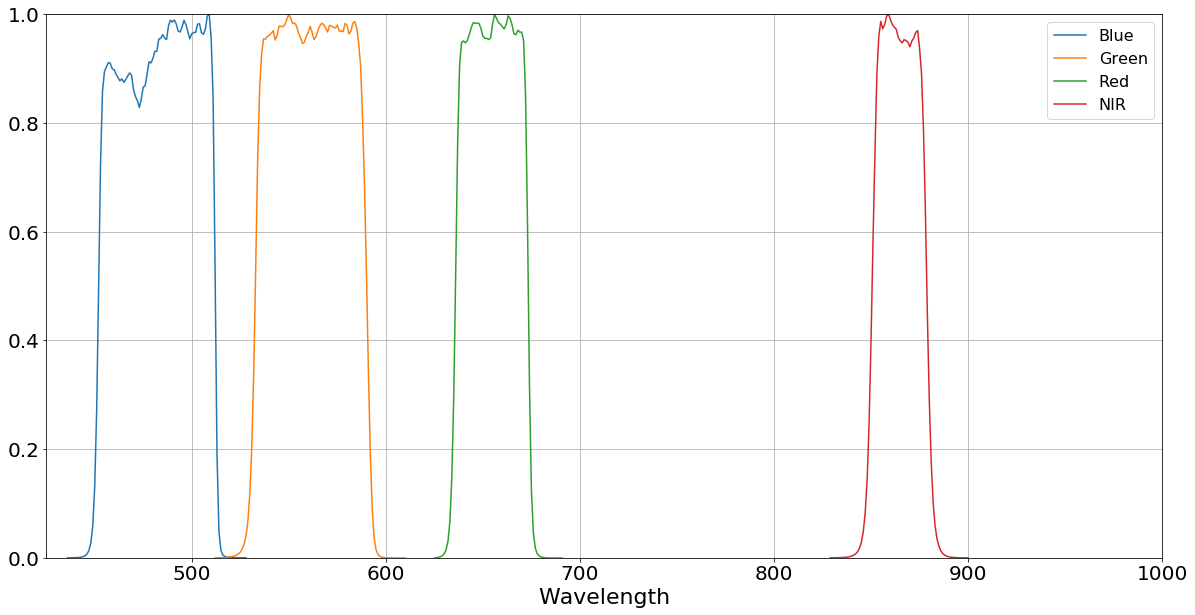

In [14]:
axx = df_l8_blue.plot(x=df_l8_blue.keys()[0], figsize=(20,10), y=df_l8_blue.keys()[1], label='Blue')
axx = df_l8_green.plot(ax=axx, x=df_l8_green.keys()[0], y=df_l8_green.keys()[1], label='Green')
axx = df_l8_red.plot(ax=axx, x=df_l8_red.keys()[0], y=df_l8_red.keys()[1], label='Red')
axx = df_l8_nir.plot(ax=axx, x=df_l8_nir.keys()[0], y=df_l8_nir.keys()[1], label='NIR')
axx.set_ylim([0,1])
axx.set_xlim([425,1000])
axx.legend(bbox_to_anchor=(1,1), loc="upper right", prop={'size': 16})
          
plt.grid(True)
plt.show()